In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
x1 = np.array( [[4,2],[2,4],[2,3],[3,6],[4,4],[1,2],[7,2],[3,1]] ) #class 1 datapoints 
x2 = np.array( [[9,10],[6,8],[9,5],[8,7],[10,8],[9,7],[6,9],[9,7]] ) #class 2 datapoints

In [106]:
mu1 =np.mean(x1, axis=0) # mu value for x1
mu2 =np.mean(x2, axis=0) #mu value for x2

In [107]:
S1 = np.dot((x1 - mu1).T, (x1 - mu1))  # Scatter matrix for Class 1
S2 = np.dot((x2 - mu2).T, (x2 - mu2))  # Scatter matrix for Class 2
SW = S1 + S2 #within class scatter matrix

In [108]:
mu = (mu1 + mu2)/2 #global mu

In [109]:
SB = np.outer((mu1 - mu2), (mu1 - mu2)) # Scatter matrix Between Classes

In [110]:
w = np.dot(np.linalg.inv(SW), (mu1 - mu2)) #projectioon vector

In [111]:
#projection of data to vector for each class

X1_proj = np.dot(X1, w)
X2_proj = np.dot(X2, w)

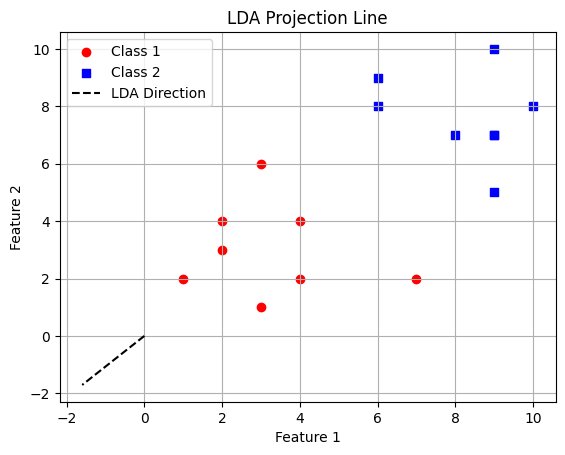

Class 1 Mean: [3.25 3.  ]
Class 2 Mean: [8.25  7.625]
LDA Projection Vector w: [-0.15994975 -0.17076415]


In [112]:
# Plot Original Data and LDA Projection
plt.scatter(X1[:, 0], X1[:, 1], label="Class 1", color="red", marker="o")
plt.scatter(X2[:, 0], X2[:, 1], label="Class 2", color="blue", marker="s")

# Plot LDA Projection Line
plt.plot([0, w[0] * 10], [0, w[1] * 10], color="black", linestyle="dashed", label="LDA Direction")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("LDA Projection Line")
plt.grid()
plt.show()

# Print Results
print("Class 1 Mean:", mu1)
print("Class 2 Mean:", mu2)
print("LDA Projection Vector w:", w)

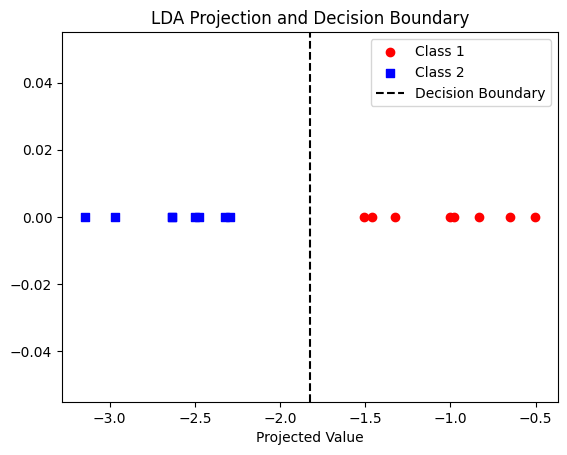

In [113]:
#Ploting the 2d datapoints to 1d

plt.scatter(X1_proj, np.zeros_like(X1_proj), color="red", marker="o", label="Class 1")
plt.scatter(X2_proj, np.zeros_like(X2_proj), color="blue", marker="s", label="Class 2")
plt.axvline(x=z_threshold, color="black", linestyle="dashed", label="Decision Boundary")

plt.xlabel("Projected Value")
plt.title("LDA Projection and Decision Boundary")
plt.legend()
plt.show()


In [114]:
# Compute mean projections (for decision boundary)
z1 = np.dot(mu1, w)  # Projection of Class 1 mean
z2 = np.dot(mu2, w)  # Projection of Class 2 mean
z_threshold = (z1 + z2) / 2  # Midpoint decision boundary

# Function to Predict Class
def predict_lda(x_new, w, z_threshold):
    z_new = np.dot(x_new, w)  # Project new sample onto w
    return 0 if z_new > z_threshold else 1  # Classify based on threshold


In [115]:
# Example: Predict class for a new sample
x_new = np.array([5, 6])  # New sample to classify
predicted_class = predict_lda(x_new, w, z_threshold)

print(f"Projected Value: {np.dot(x_new, w):.3f}")
print(f"Decision Threshold: {z_threshold:.3f}")
print(f"Predicted Class: {'Class 2' if predicted_class == 1 else 'Class 1'}")

Projected Value: -1.824
Decision Threshold: -1.827
Predicted Class: Class 1
